In [1]:
from pyforest import *

In [2]:
df = pd.read_csv('H-1B_Disclosure_Data_FY17.csv')

C:\Users\Hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(528146, 40)

In [4]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2/24/2016,10/1/2016,H-1B,8/10/2016,8/10/2019,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,...,"65,811.00","67,320.00",Year,N,N,RIVERWOODS,LAKE,IL,60015,3/1/2016
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,3/4/2016,10/1/2016,H-1B,8/16/2016,8/16/2019,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,...,"53,000.00","57,200.00",Year,N,N,RIVERWOODS,LAKE,IL,60015,3/8/2016
2,I-200-16063-996093,CERTIFIED-WITHDRAWN,3/10/2016,10/1/2016,H-1B,9/9/2016,9/9/2019,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,...,"77,000.00",0,Year,Y,N,WASHINGTON,NaN,DC,20007,3/16/2016
3,I-200-16272-196340,WITHDRAWN,9/28/2016,10/1/2016,H-1B,1/26/2017,1/25/2020,INFO SERVICES LLC,17177 NORTH LAUREL PARK DR,LIVONIA,...,"102,000.00",0,Year,Y,N,JERSEY CITY,HUDSON,NJ,7302,NaN
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2/22/2015,10/2/2016,H-1B,3/1/2015,3/1/2018,BB&T CORPORATION,223 WEST NASH STREET,WILSON,...,"132,500.00",0,Year,N,N,NEW YORK,NEW YORK,NY,10036,2/26/2015


In [5]:
df.dtypes

CASE_NUMBER               object
CASE_STATUS               object
CASE_SUBMITTED            object
DECISION_DATE             object
VISA_CLASS                object
EMPLOYMENT_START_DATE     object
EMPLOYMENT_END_DATE       object
EMPLOYER_NAME             object
EMPLOYER_ADDRESS          object
EMPLOYER_CITY             object
EMPLOYER_STATE            object
EMPLOYER_POSTAL_CODE      object
EMPLOYER_COUNTRY          object
EMPLOYER_PROVINCE         object
EMPLOYER_PHONE            object
EMPLOYER_PHONE_EXT        object
AGENT_ATTORNEY_NAME       object
AGENT_ATTORNEY_CITY       object
AGENT_ATTORNEY_STATE      object
JOB_TITLE                 object
SOC_CODE                  object
SOC_NAME                  object
NAICS_CODE               float64
TOTAL_WORKERS              int64
FULL_TIME_POSITION        object
PREVAILING_WAGE           object
PW_UNIT_OF_PAY            object
PW_SOURCE                 object
PW_SOURCE_YEAR           float64
PW_SOURCE_OTHER           object
WAGE_RATE_

In [6]:
df.describe()

,NAICS_CODE,TOTAL_WORKERS,PW_SOURCE_YEAR
count,528140.000000,528146.000000,528113.000000
mean,443547.381317,1.907226,2016.057255
std,197877.454722,4.925119,5.562917
min,31.000000,0.000000,0.000000
25%,452910.000000,1.000000,2016.000000
50%,541511.000000,1.000000,2016.000000
75%,541511.000000,1.000000,2016.000000
max,999990.000000,155.000000,2017.000000


In [7]:
df.describe(include='object')

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
count,528146,528146,528146,528146,528146,528129,528129,528103,528140,528132,...,528146,528145,528140,517845,517844,528136,527140,528139,528131,36184
unique,528146,4,1212,266,4,1499,1549,65130,58833,4876,...,45730,13038,5,2,2,7417,3422,57,14083,972
top,I-200-17101-244896,CERTIFIED,3/15/2017,3/23/2017,H-1B,9/1/2017,8/31/2020,INFOSYS LIMITED,6100 TENNYSON PARKWAY,PLANO,...,"60,000.00",0,Year,N,N,NEW YORK,SANTA CLARA,CA,94043,3/16/2016
freq,1,468970,12287,17643,517365,25653,15842,17059,17200,29220,...,30778,413267,494672,322868,517420,31956,35693,101338,5850,517


# Columns

In [8]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_SOURCE', 'PW_SOURCE_YEAR',
       'PW_SOURCE_OTHER', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO',
       'WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE'],
      dtype='object')

#### Columns to be considered

In [9]:
df1 = df[['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE','VISA_CLASS', 
          'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_ADDRESS','EMPLOYER_COUNTRY','EMPLOYER_STATE',
          'AGENT_ATTORNEY_NAME','JOB_TITLE', 'SOC_CODE','SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 
          'FULL_TIME_POSITION','PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_SOURCE_YEAR', 
          'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR']]

# UNI-VARIATE ANALYSIS

#### CASE_STATUS

In [10]:
df1.CASE_STATUS.value_counts().plot(kind='bar')

In [11]:
(df1.CASE_STATUS.value_counts()/df1.shape[0])*100

CERTIFIED              88.795522
CERTIFIED-WITHDRAWN     6.848674
WITHDRAWN               3.032495
DENIED                  1.323308
Name: CASE_STATUS, dtype: float64

##### Observation : 88% observations are from certified and 1% from Denied which tells that there is imbalance

#### VISA_CLASS

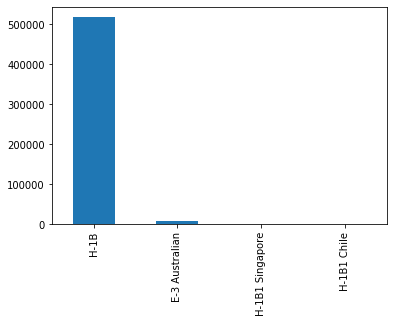

In [12]:
df1.VISA_CLASS.value_counts().plot(kind='bar')

In [13]:
(df1.VISA_CLASS.value_counts()/df1.shape[0])*100

H-1B               97.958708
E-3 Australian      1.730203
H-1B1 Singapore     0.176088
H-1B1 Chile         0.135001
Name: VISA_CLASS, dtype: float64

##### Observation : 97% observations are from H1-B which tells that  maximum applicants are applying for H1B Visa

#### EMPLOYER_NAME

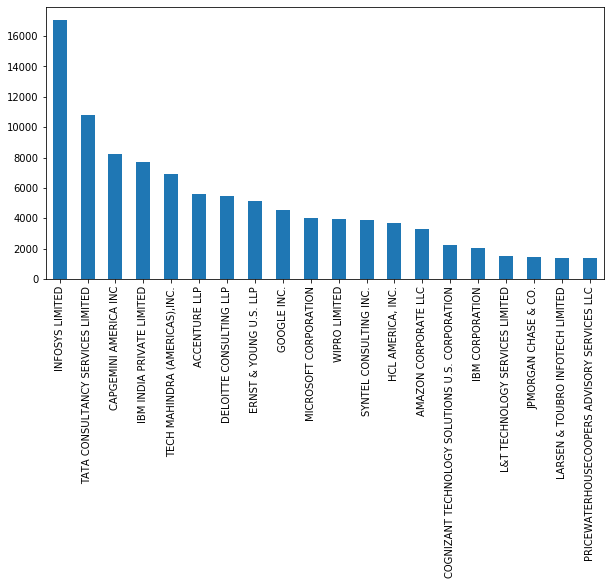

In [14]:
plt.figure(figsize=(10,5))
df1.EMPLOYER_NAME.value_counts().head(20).plot(kind='bar')

In [15]:
(df1.EMPLOYER_NAME.value_counts()/df1.shape[0])*100

INFOSYS LIMITED                                       3.229978
TATA CONSULTANCY SERVICES LIMITED                     2.046025
CAPGEMINI AMERICA INC                                 1.554116
IBM INDIA PRIVATE LIMITED                             1.452818
TECH MAHINDRA (AMERICAS),INC.                         1.307025
ACCENTURE LLP                                         1.055201
DELOITTE CONSULTING LLP                               1.031722
ERNST & YOUNG U.S. LLP                                0.973784
GOOGLE INC.                                           0.858096
MICROSOFT CORPORATION                                 0.765319
WIPRO LIMITED                                         0.747331
SYNTEL CONSULTING INC.                                0.733888
HCL AMERICA, INC.                                     0.702268
AMAZON CORPORATE LLC                                  0.619147
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION       0.428669
IBM CORPORATION                                       0

##### Observation : The highest applicants are for Employer Infosys, CapGemini, IBM, Tech Mahindra

#### EMPLOYER_COUNTRY

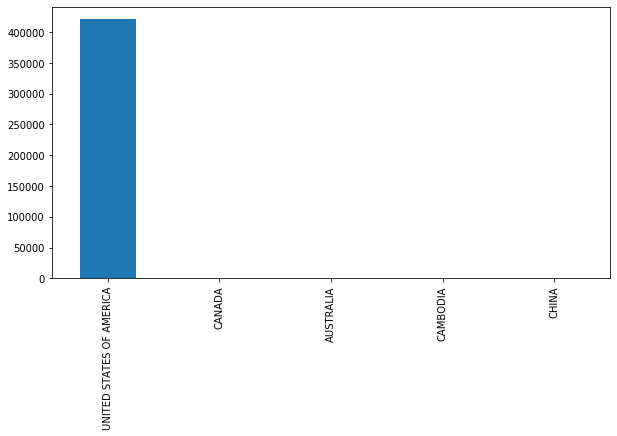

In [16]:
plt.figure(figsize=(10,5))
df1.EMPLOYER_COUNTRY.value_counts().plot(kind='bar')

In [17]:
(df1.EMPLOYER_COUNTRY.value_counts()/df1.shape[0])*100

UNITED STATES OF AMERICA    79.603557
CANADA                       0.001325
AUSTRALIA                    0.000379
CAMBODIA                     0.000189
CHINA                        0.000189
Name: EMPLOYER_COUNTRY, dtype: float64

#### Here if we add up the percentage of all the categories of EMPLOYER_COUNTRY it will not add up to 100% because the remaining percentage is of null values in EMPLOYER_COUNTRY.

##### Observation : Maximum Applicants are for Employer Country USA

#### EMPLOYER_STATE

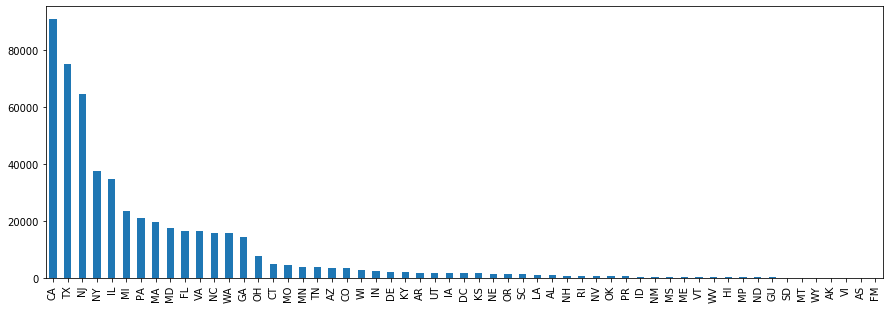

In [18]:
plt.figure(figsize=(15,5))
df1.EMPLOYER_STATE.value_counts().plot(kind='bar')

In [19]:
(df1.EMPLOYER_STATE.value_counts()/df1.shape[0])*100

CA    17.179719
TX    14.238676
NJ    12.190758
NY     7.128521
IL     6.567313
MI     4.421505
PA     3.968410
MA     3.730976
MD     3.296626
FL     3.109557
VA     3.102741
NC     3.021134
WA     3.004851
GA     2.734282
OH     1.477054
CT     0.963559
MO     0.856392
MN     0.760017
TN     0.724610
AZ     0.678790
CO     0.664021
WI     0.559694
IN     0.461047
DE     0.387393
KY     0.383985
AR     0.359938
UT     0.340436
IA     0.337217
DC     0.333999
KS     0.302000
NE     0.277575
OR     0.271516
SC     0.250499
LA     0.204868
AL     0.188395
NH     0.167189
RI     0.166431
NV     0.155828
OK     0.152988
PR     0.107735
ID     0.102812
NM     0.093913
MS     0.081796
ME     0.074790
VT     0.063997
WV     0.058317
HI     0.057370
MP     0.051880
ND     0.046578
GU     0.042223
SD     0.034839
MT     0.018366
WY     0.018366
AK     0.013065
VI     0.010035
AS     0.000189
FM     0.000189
Name: EMPLOYER_STATE, dtype: float64

##### Observation :  California, New Jersey, Texas has highest applicants

#### JOB_TITLE

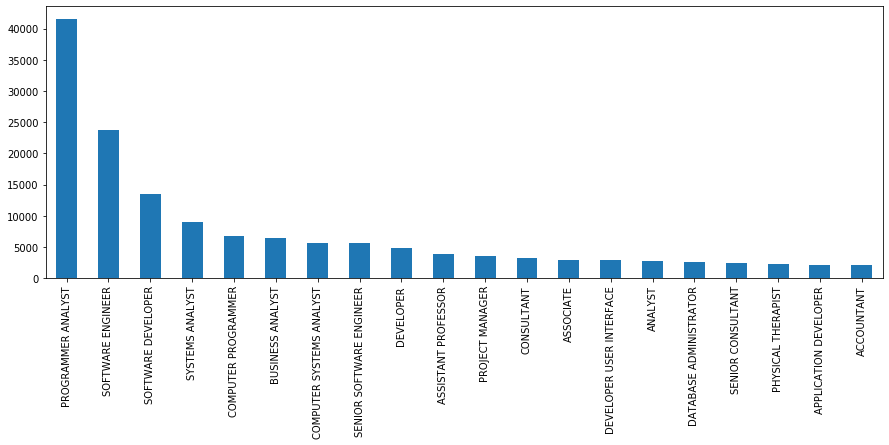

In [20]:
plt.figure(figsize=(15,5))
df1.JOB_TITLE.value_counts().head(20).plot(kind='bar')

In [21]:
(df1.JOB_TITLE.value_counts()/df1.shape[0])*100

PROGRAMMER ANALYST                                        7.855972
SOFTWARE ENGINEER                                         4.502164
SOFTWARE DEVELOPER                                        2.558952
SYSTEMS ANALYST                                           1.693660
COMPUTER PROGRAMMER                                       1.277109
BUSINESS ANALYST                                          1.224283
COMPUTER SYSTEMS ANALYST                                  1.066940
SENIOR SOFTWARE ENGINEER                                  1.059366
DEVELOPER                                                 0.904674
ASSISTANT PROFESSOR                                       0.746006
PROJECT MANAGER                                           0.676707
CONSULTANT                                                0.603432
ASSOCIATE                                                 0.567078
DEVELOPER USER INTERFACE                                  0.558747
ANALYST                                                   0.53

##### Observation : Applicants with Job title as PROGRAMMER ANALYST, SOFTWARE ENGINEER, SOFTWARE DEVELOPER are applying most

#### SOC_NAME

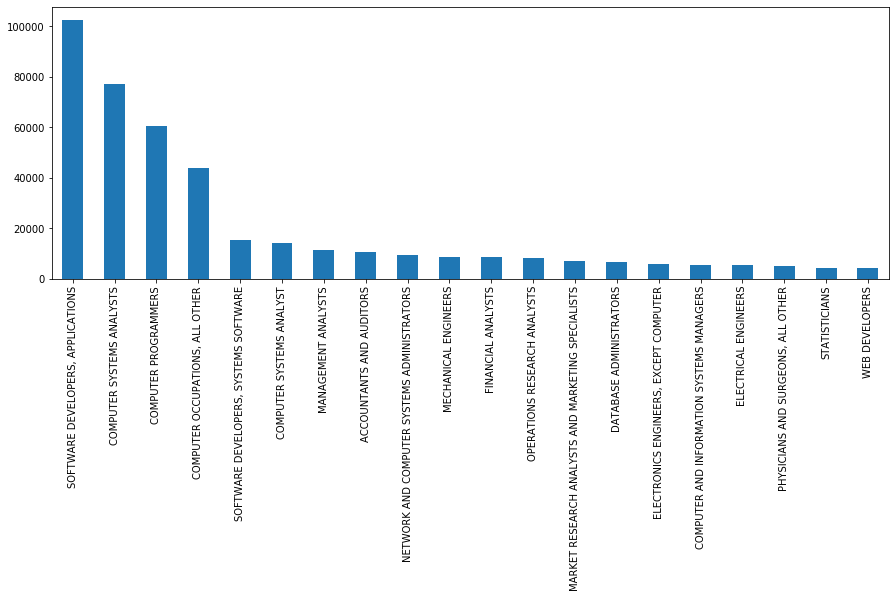

In [22]:
plt.figure(figsize=(15,5))
df1.SOC_NAME.value_counts().head(20).plot(kind='bar')

In [23]:
(df1.SOC_NAME.value_counts()/df1.shape[0])*100

SOFTWARE DEVELOPERS, APPLICATIONS                       19.412625
COMPUTER SYSTEMS ANALYSTS                               14.594828
COMPUTER PROGRAMMERS                                    11.421084
COMPUTER OCCUPATIONS, ALL OTHER                          8.287670
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                    2.914535
COMPUTER SYSTEMS ANALYST                                 2.668580
MANAGEMENT ANALYSTS                                      2.120815
ACCOUNTANTS AND AUDITORS                                 1.984678
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS              1.767504
MECHANICAL ENGINEERS                                     1.648597
FINANCIAL ANALYSTS                                       1.617545
OPERATIONS RESEARCH ANALYSTS                             1.556198
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS       1.301155
DATABASE ADMINISTRATORS                                  1.233560
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                   1.069401
COMPUTER A

##### Observation : Most Applications are from SOC_NAME SOFTWARE DEVELOPERS, APPLICATIONS, COMPUTER SYSTEMS ANALYSTS,COMPUTER PROGRAMMERS

#### TOTAL_WORKERS

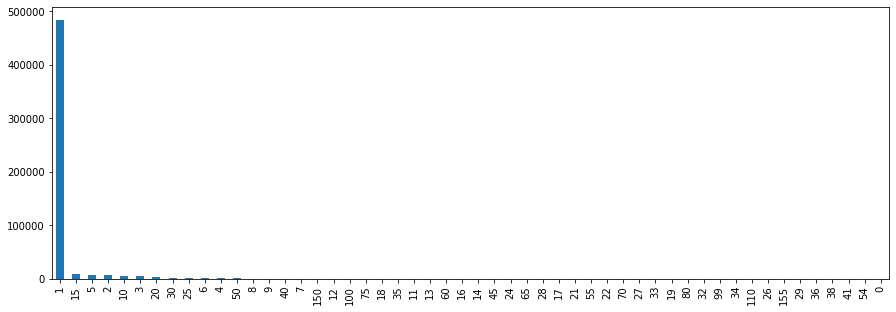

In [24]:
plt.figure(figsize=(15,5))
df1.TOTAL_WORKERS.value_counts().plot(kind='bar')

##### Observation : Total number of foreign workers request by the employer is mostly 1

#### FULL_TIME_POSITION

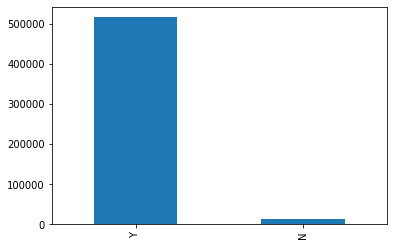

In [25]:
df1.FULL_TIME_POSITION.value_counts().plot(kind='bar')

In [26]:
(df1.FULL_TIME_POSITION.value_counts()/df1.shape[0])*100

Y    97.689843
N     2.309399
Name: FULL_TIME_POSITION, dtype: float64

##### Observation : 97% of applicants are full time applicants

#### PREVAILING_WAGE

In [27]:
df1['PREVAILING_WAGE']=df1['PREVAILING_WAGE'].apply(lambda x:x.replace(",",""))

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df1['PREVAILING_WAGE'] = df1['PREVAILING_WAGE'].astype('float')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


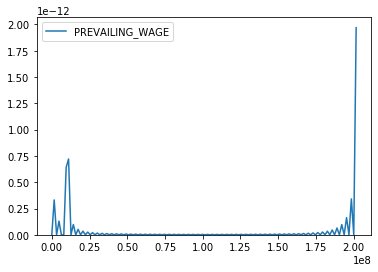

In [29]:
sns.kdeplot(df1.PREVAILING_WAGE)

##### Observation : Prevailing Wage is not distributed normally and highly skewed with multiple peaks

#### PW_UNIT_OF_PAY

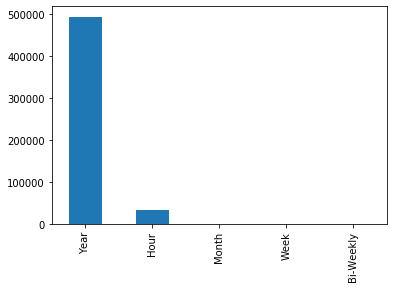

In [30]:
df1.PW_UNIT_OF_PAY.value_counts().plot(kind='bar')

In [31]:
(df1.PW_UNIT_OF_PAY.value_counts()/df1.shape[0])*100

Year         93.642667
Hour          6.268721
Month         0.049797
Week          0.023289
Bi-Weekly     0.008899
Name: PW_UNIT_OF_PAY, dtype: float64

##### Observation : Most of the applications are paid Yearly

#### PW_SOURCE_YEAR

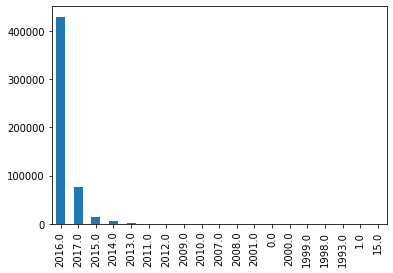

In [32]:
df1.PW_SOURCE_YEAR.value_counts().plot(kind='bar')

In [33]:
(df1.PW_SOURCE_YEAR.value_counts()/df1.shape[0])*100

2016.0    81.239468
2017.0    14.275598
2015.0     2.674639
2014.0     1.225608
2013.0     0.509518
2011.0     0.038626
2012.0     0.015715
2009.0     0.004734
2010.0     0.002651
2007.0     0.002461
2008.0     0.002461
2001.0     0.000757
0.0        0.000379
2000.0     0.000189
1999.0     0.000189
1998.0     0.000189
1993.0     0.000189
1.0        0.000189
15.0       0.000189
Name: PW_SOURCE_YEAR, dtype: float64

##### Observation : PW information is taken mostly of the year 2016

#### WAGE_RATE_OF_PAY_FROM

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


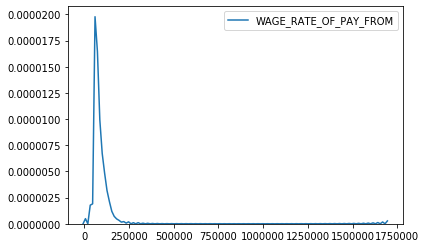

In [34]:
df1['WAGE_RATE_OF_PAY_FROM']=df1['WAGE_RATE_OF_PAY_FROM'].apply(lambda x:x.replace(",",""))
df1['WAGE_RATE_OF_PAY_FROM'] = df1['WAGE_RATE_OF_PAY_FROM'].astype('float')
sns.kdeplot(df1.WAGE_RATE_OF_PAY_FROM)

##### Observation :  Highly right skewed 

#### H-1B_DEPENDENT

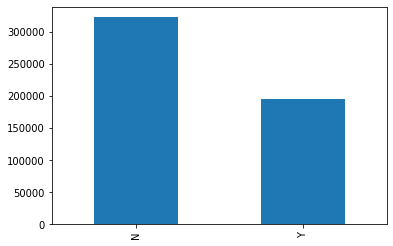

In [35]:
df1['H-1B_DEPENDENT'].value_counts().plot(kind='bar')

In [36]:
(df1['H-1B_DEPENDENT'].value_counts()/df1.shape[0])*100

N    61.132338
Y    36.917254
Name: H-1B_DEPENDENT, dtype: float64

##### Observation : Applicants with No H1B dependents have more count than applicants with H1B Applicants

#### WILLFUL_VIOLATOR

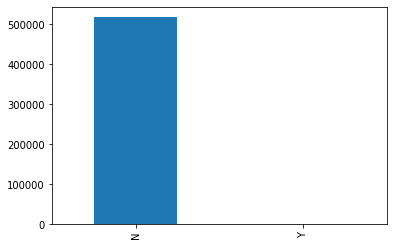

In [37]:
df1.WILLFUL_VIOLATOR.value_counts().plot(kind='bar')

In [38]:
(df1['WILLFUL_VIOLATOR'].value_counts()/df1.shape[0])*100

N    97.969122
Y     0.080281
Name: WILLFUL_VIOLATOR, dtype: float64

##### Observation : Most of the applicants have not violated any norms

# BI-VARIATE ANALYSIS

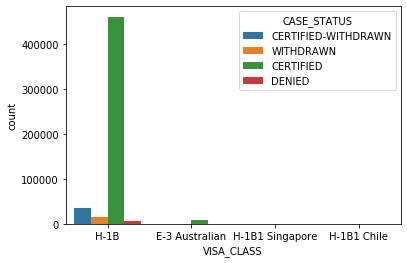

In [39]:
sns.countplot(df1.VISA_CLASS,hue=df1.CASE_STATUS)

##### Observation - Maximum number of applicants are for H1B Visa and are maximum of them are certified

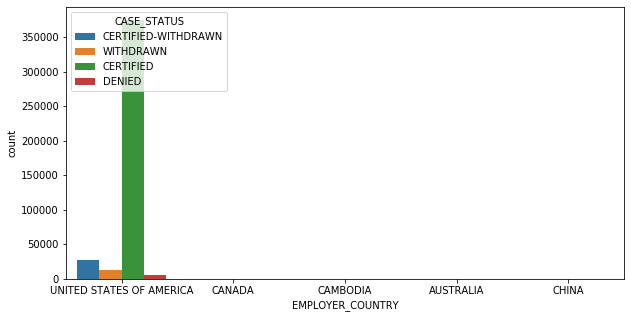

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(df1.EMPLOYER_COUNTRY,hue=df.CASE_STATUS)

##### Observation - Employers_Country USA has maximum number of Applicants

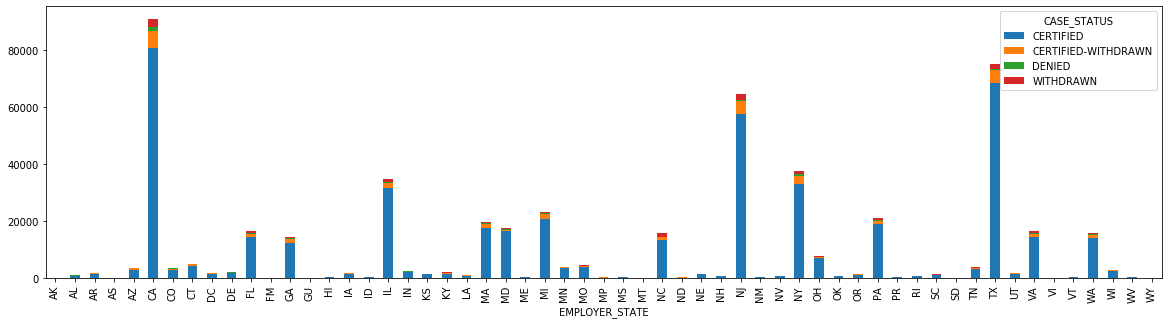

In [41]:
crosstab = pd.crosstab(index=df1.EMPLOYER_STATE,columns=df1.CASE_STATUS)
crosstab.plot.bar(stacked=True,figsize=(20,5),legend=True)

##### Observation : The applicatants are maximum for California,Texas and New Jersey

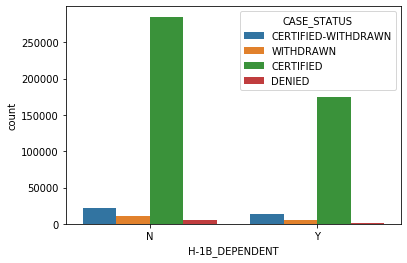

In [42]:
sns.countplot(df1['H-1B_DEPENDENT'],hue=df1.CASE_STATUS)

##### Observation - Here we can say that the applicants Certification and Denial is not dependent on H-1B_DEPENDENT

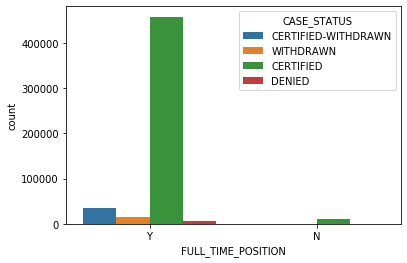

In [43]:
sns.countplot(df1['FULL_TIME_POSITION'],hue=df1.CASE_STATUS)

##### Observation - Here we can say that the applicants Certification and Denial is not dependent on FULL_TIME_POSITION

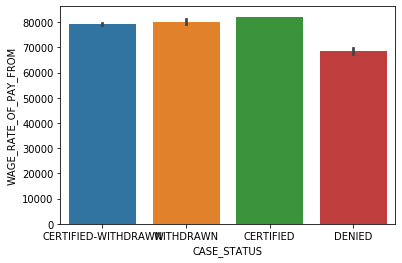

In [44]:
sns.barplot(x=df1['CASE_STATUS'],y=df1['WAGE_RATE_OF_PAY_FROM'])

##### Observation : WAGE_RATE_OF_PAY_FROM has huge amount of outliers and Certified and Denied WAGE_RATE_OF_PAY_FROM is almost similar

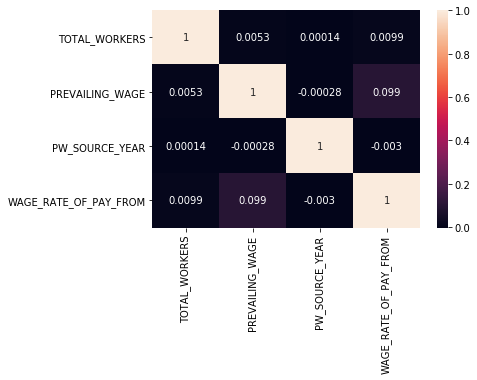

In [45]:
dfnum = df1[['TOTAL_WORKERS','PREVAILING_WAGE','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_FROM']]
sns.heatmap(dfnum.corr(),annot=True)

##### No correlation can be seen between the continous variables of the dataset

# Problem Statement : Predicting the Status of H-1B Visa Applications

- According to the problem statemnt we take only H1B Applications from the dataset
- H1B visas are for US Based Companies hence we consider EMPLOYER_COUNTRY as USA
- According to the business problem the Employer will be concerned whether the Employees visa is getting Certified or Denied hence we take dataset with CASE_STATUS as CERTIFIED and DENIED only
- Taking dataset of the year 2017

# Filtering Dataset

##### 1. Filtering on CASE_STATUS

In [46]:
casestatus = ['CERTIFIED', 'DENIED']
df1 = df1[df1.CASE_STATUS.isin(casestatus)]

##### 2. Filtering on VISA_CLASS

In [47]:
df1 = df1[df1.VISA_CLASS == 'H-1B']

##### 3. Filtering on EMPLOYER_COUNTRY

In [48]:
df1.shape

(466099, 25)

In [49]:
df1 = df1.dropna(axis=0, subset=['EMPLOYER_STATE'])

##### 4. Filtering for year 2017

Extracting Year From CASE_SUBMITTED_YEAR Column

In [50]:
df1['CASE_SUBMITTED'] = pd.to_datetime(df1['CASE_SUBMITTED'])

In [51]:
df1["CASE_SUBMITTED_YEAR"] = df1['CASE_SUBMITTED'].dt.year 

In [52]:
df1['CASE_SUBMITTED_YEAR'].value_counts()

2017    386391
2016     79697
Name: CASE_SUBMITTED_YEAR, dtype: int64

In [53]:
df1 = df1[df1.CASE_SUBMITTED_YEAR==2017]

In [54]:
df1.shape

(386391, 26)

# TREATING NULL VALUES and ANAMOLIES in DATASET

In [55]:
df1.isnull().sum()[df1.isnull().sum()!=0]

EMPLOYMENT_START_DATE       11
EMPLOYMENT_END_DATE         13
EMPLOYER_NAME               23
EMPLOYER_ADDRESS             1
EMPLOYER_COUNTRY         92255
JOB_TITLE                    2
NAICS_CODE                   2
FULL_TIME_POSITION           2
PW_UNIT_OF_PAY              18
PW_SOURCE_YEAR              18
WAGE_UNIT_OF_PAY             3
H-1B_DEPENDENT               2
WILLFUL_VIOLATOR             2
dtype: int64

In [56]:
((df1.isnull().sum()[df1.isnull().sum()!=0]/df1.shape[0])*100).sort_values(ascending=False)

EMPLOYER_COUNTRY         23.876074
EMPLOYER_NAME             0.005953
PW_SOURCE_YEAR            0.004658
PW_UNIT_OF_PAY            0.004658
EMPLOYMENT_END_DATE       0.003364
EMPLOYMENT_START_DATE     0.002847
WAGE_UNIT_OF_PAY          0.000776
WILLFUL_VIOLATOR          0.000518
H-1B_DEPENDENT            0.000518
FULL_TIME_POSITION        0.000518
NAICS_CODE                0.000518
JOB_TITLE                 0.000518
EMPLOYER_ADDRESS          0.000259
dtype: float64

#### Column - EMPLOYER NAME

In [57]:
df1.EMPLOYER_NAME.isnull().sum()

23

In [58]:
df1[df1.EMPLOYER_NAME.isnull()]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
110168,DENIED,2017-01-13,1/19/2017,H-1B,2/1/2017,6/21/2018,NaN,18753 N. FREDERICK AVENUE,UNITED STATES OF AMERICA,MD,...,Y,60000.00,Year,2016.0,60000.00,0,Year,N,N,2017
110605,CERTIFIED,2017-01-12,1/19/2017,H-1B,1/12/2017,1/26/2018,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,51293.00,Year,2017.0,71000.00,0,Year,Y,N,2017
111700,CERTIFIED,2017-01-13,1/20/2017,H-1B,1/16/2017,1/16/2020,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,59779.00,Year,2017.0,65000.00,0,Year,Y,N,2017
112292,CERTIFIED,2017-01-13,1/20/2017,H-1B,4/30/2017,4/29/2020,NaN,I-20 & ALPINE ROAD,UNITED STATES OF AMERICA,SC,...,Y,93558.00,Year,2017.0,105000.00,0,Year,N,N,2017
115180,CERTIFIED,2017-01-17,1/23/2017,H-1B,2/1/2017,2/1/2020,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,54226.00,Year,2017.0,65000.00,0,Year,Y,N,2017
119189,CERTIFIED,2017-01-19,1/25/2017,H-1B,2/23/2017,2/22/2020,NaN,CONCOURSE CORPORATE CENTER,UNITED STATES OF AMERICA,GA,...,Y,76003.00,Year,2016.0,77000.00,"95,000.00",Year,Y,N,2017
119190,CERTIFIED,2017-01-19,1/25/2017,H-1B,1/30/2017,1/30/2020,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,62754.00,Year,2017.0,65000.00,0,Year,Y,N,2017
130352,CERTIFIED,2017-01-26,2/1/2017,H-1B,1/26/2017,1/26/2020,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,74443.00,Year,2017.0,75000.00,0,Year,Y,N,2017
137158,CERTIFIED,2017-01-31,2/6/2017,H-1B,2/13/2017,2/12/2020,NaN,343 THORNALL STREET,UNITED STATES OF AMERICA,NJ,...,Y,84864.00,Year,2017.0,85000.00,0,Year,Y,N,2017
152919,CERTIFIED,2017-02-07,2/13/2017,H-1B,2/7/2017,2/7/2020,NaN,222 NO. SEPULVEDA BLVD.,UNITED STATES OF AMERICA,CA,...,Y,54434.00,Year,2017.0,65000.00,0,Year,Y,N,2017


In [59]:
df1.EMPLOYER_ADDRESS[df1.EMPLOYER_NAME.isnull()]

110168          18753 N. FREDERICK AVENUE
110605            222 NO. SEPULVEDA BLVD.
111700            222 NO. SEPULVEDA BLVD.
112292                 I-20 & ALPINE ROAD
115180            222 NO. SEPULVEDA BLVD.
119189         CONCOURSE CORPORATE CENTER
119190            222 NO. SEPULVEDA BLVD.
130352            222 NO. SEPULVEDA BLVD.
137158                343 THORNALL STREET
152919            222 NO. SEPULVEDA BLVD.
172179            222 NO. SEPULVEDA BLVD.
186080            222 NO. SEPULVEDA BLVD.
211285            222 NO. SEPULVEDA BLVD.
218598            222 NO. SEPULVEDA BLVD.
224946            222 NO. SEPULVEDA BLVD.
231532            222 NO. SEPULVEDA BLVD.
233513            222 NO. SEPULVEDA BLVD.
256078              3467 NOTRE DAME DRIVE
333330          1600 AMPHITHEATRE PARKWAY
404641    488 NORTH MAIN STREET SUITE 216
406646                      6 MOYSE PLACE
420363       1 CYCLOTRON ROAD, MS 65A-108
508116                  ONE LIBERTY PLAZA
Name: EMPLOYER_ADDRESS, dtype: obj

##### Imputing the null values in EMPLOYER_NAME based on the address of the EMPLOYER

In [60]:
df1[df1.EMPLOYER_ADDRESS=='18753 N. FREDERICK AVENUE']
#Checking address of each null EMPLOYER_NAME and imputing in it

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
105344,DENIED,2017-01-10,1/13/2017,H-1B,2/1/2017,2/7/2018,"MGS SERVICES, LLC",18753 N. FREDERICK AVENUE,UNITED STATES OF AMERICA,MD,...,Y,60000.0,Year,2016.0,60000.0,0,Year,N,N,2017
108803,DENIED,2017-01-13,1/18/2017,H-1B,2/1/2017,2/7/2018,"MGS SERVICES, LLC",18753 N. FREDERICK AVENUE,UNITED STATES OF AMERICA,MD,...,Y,60000.0,Year,2016.0,60000.0,0,Year,N,N,2017
110168,DENIED,2017-01-13,1/19/2017,H-1B,2/1/2017,6/21/2018,NaN,18753 N. FREDERICK AVENUE,UNITED STATES OF AMERICA,MD,...,Y,60000.0,Year,2016.0,60000.0,0,Year,N,N,2017
111609,CERTIFIED,2017-01-13,1/20/2017,H-1B,2/1/2017,6/21/2018,"MGS SERVICES, LLC",18753 N. FREDERICK AVENUE,UNITED STATES OF AMERICA,MD,...,Y,60000.0,Year,2016.0,60000.0,0,Year,N,N,2017


In [61]:
df1.loc[df1.EMPLOYER_ADDRESS=='18753 N. FREDERICK AVENUE','EMPLOYER_NAME']='MGS SERVICES, LLC'
df1.loc[df1.EMPLOYER_ADDRESS=='222 NO. SEPULVEDA BLVD.','EMPLOYER_NAME']='RJT COMPUQUEST, INC.'
df1.loc[df1.EMPLOYER_ADDRESS=='I-20 & ALPINE ROAD','EMPLOYER_NAME']='BLUE CROSS BLUE SHIELD OF SOUTH CAROLINA'
df1.loc[df1.EMPLOYER_ADDRESS=='CONCOURSE CORPORATE CENTER','EMPLOYER_NAME']='TECHPILLARS, INC.'
df1.loc[df1.EMPLOYER_ADDRESS=='343 THORNALL STREET','EMPLOYER_NAME']='XORIANT CORPORATION'
df1.loc[df1.EMPLOYER_ADDRESS=='3467 NOTRE DAME DRIVE','EMPLOYER_NAME']='ACCUPARA INC.'
df1.loc[df1.EMPLOYER_ADDRESS=='1600 AMPHITHEATRE PARKWAY','EMPLOYER_NAME']='GOOGLE INC.'
df1.loc[df1.EMPLOYER_ADDRESS=='488 NORTH MAIN STREET SUITE 216','EMPLOYER_NAME']='TALENTSPACE INC'
df1.loc[df1.EMPLOYER_ADDRESS=='6 MOYSE PLACE','EMPLOYER_NAME']='MCKINSOL CONSULTING INC.'
df1.loc[df1.EMPLOYER_ADDRESS=='1 CYCLOTRON ROAD, MS 65A-108','EMPLOYER_NAME']='LAWRENCE BERKELEY NATIONAL LABORATORY'
df1.loc[df1.EMPLOYER_ADDRESS=='ONE LIBERTY PLAZA','EMPLOYER_NAME']='ITG SOFTWARE SOLUTIONS INC'


In [62]:
df1[df1.EMPLOYER_NAME.isnull()]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR


#### Column - FULL_TIME_POSITION

In [63]:
df1.FULL_TIME_POSITION.isnull().sum()

2

In [64]:
df1[df1.FULL_TIME_POSITION.isnull()]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
175373,DENIED,2017-02-21,2/22/2017,H-1B,8/21/2017,8/20/2020,TATA CONSULTANCY SERVICES LIMITED,9201 CORPORATE BOULEVARD,UNITED STATES OF AMERICA,MD,...,NaN,51376.0,Year,2016.0,62500.0,"94,000.00",Year,Y,N,2017
178701,DENIED,2017-02-21,2/23/2017,H-1B,8/21/2017,8/20/2020,TATA CONSULTANCY SERVICES LIMITED,9201 CORPORATE BOULEVARD,UNITED STATES OF AMERICA,MD,...,NaN,50294.0,Year,2016.0,60700.0,"85,500.00",Year,Y,N,2017


##### The 2 null values are of the employer TATA Consultancy Services who offers only full tym job..hence imputing null with Y

In [65]:
df1.FULL_TIME_POSITION.fillna('Y',inplace=True)
df1.FULL_TIME_POSITION.isnull().sum()

0

#### Column - PREVAILING_WAGE

In [66]:
df1.PREVAILING_WAGE.isnull().sum()

0

In [67]:
df1[df1.PREVAILING_WAGE==0].shape #ANAMOLY because PREVAILING_WAGE cannot be 0

(20, 26)

In [68]:
df1[df1.PREVAILING_WAGE==0]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
99325,DENIED,2017-01-04,1/10/2017,H-1B,1/16/2017,1/16/2020,OPTIMUS CONSTRUCTION INC,440 WESTERN AVE # 202,UNITED STATES OF AMERICA,CA,...,Y,0.0,NaN,NaN,80000.00,0,Year,N,N,2017
120405,DENIED,2017-01-24,1/26/2017,H-1B,5/20/2017,5/2/2020,BERG LLC,500 OLD CONNECTICUT PATH,UNITED STATES OF AMERICA,MA,...,Y,0.0,NaN,NaN,70000.00,0,Year,N,N,2017
134293,DENIED,2017-01-30,2/3/2017,H-1B,1/30/2017,1/30/2020,"INSPIRATION ANYWHERE, INC.",855 APPLE TREE LANE,UNITED STATES OF AMERICA,IL,...,Y,0.0,NaN,NaN,50000.00,0,Year,N,N,2017
198143,DENIED,2017-02-28,3/1/2017,H-1B,3/1/2017,3/1/2020,"AARC ENVIRONMENTAL, INC",TWO RIVERWAY,UNITED STATES OF AMERICA,TX,...,Y,0.0,NaN,NaN,38000.00,"65,000.00",Year,N,N,2017
204818,DENIED,2017-02-28,3/2/2017,H-1B,11/18/2017,11/18/2020,DOCUWRX CORPORATION,14010 ROOSEVELT BLVD SUITE 710,UNITED STATES OF AMERICA,FL,...,Y,0.0,NaN,NaN,1000.00,"1,400.00",Week,N,N,2017
214732,DENIED,2017-03-02,3/6/2017,H-1B,8/31/2017,8/30/2020,PETRA HEALTH CARE LLC,55 MIDDLESEX STRET,UNITED STATES OF AMERICA,MA,...,Y,0.0,NaN,NaN,95000.00,0,Year,N,N,2017
232431,DENIED,2017-03-06,3/8/2017,H-1B,8/17/2016,8/17/2019,INDUSTRIAL AUTOMATION GROUP,1349 COLDWELL AVE.,UNITED STATES OF AMERICA,CA,...,Y,0.0,NaN,NaN,63000.00,0,Year,N,Y,2017
238741,DENIED,2017-03-03,3/9/2017,H-1B,9/1/2017,8/31/2020,"REDROCK SECURITY & CABLING, INC.",6 MORGAN,UNITED STATES OF AMERICA,CA,...,Y,0.0,NaN,NaN,1153.85,"1,500.00",Week,Y,N,2017
263118,DENIED,2017-03-09,3/13/2017,H-1B,9/6/2017,8/30/2020,LAMBDANETS INC,2929 KENNY ROAD,UNITED STATES OF AMERICA,OH,...,Y,0.0,NaN,NaN,63814.00,0,Year,N,N,2017
288266,DENIED,2017-03-09,3/16/2017,H-1B,8/1/2017,8/1/2020,"ALTERNATIVES ABA, INC.",45R WASHINGTON STREET,UNITED STATES OF AMERICA,MA,...,N,0.0,NaN,NaN,28.00,0,Hour,N,N,2017


In [69]:
df1.PREVAILING_WAGE.describe()

count    3.863910e+05
mean     7.139588e+04
std      3.262117e+05
min      0.000000e+00
25%      5.591000e+04
50%      6.839000e+04
75%      8.565400e+04
max      2.016227e+08
Name: PREVAILING_WAGE, dtype: float64

##### Imputing null values with median value of PREVALING_WAGE for the respective EMPLOYER_NAME.
##### If the EMPLOYER_NAME is a single observation then imputing with the median of PREVALING_WAGE for the respective JOB_TITLE.
##### If the JOB_TITLE and EMPLOYER_NAME is also unique then imputing with the median of PREVALING_WAGE with respect to the WAGE_UNIT_OF_PAy.

In [70]:
df1.loc[(df1.EMPLOYER_NAME=='OPTIMUS CONSTRUCTION INC')  & (df1.PREVAILING_WAGE==0) 
        ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='OPTIMUS CONSTRUCTION INC'].median()

In [71]:
df1.loc[(df1.EMPLOYER_NAME=='BERG LLC')  & (df1.PREVAILING_WAGE==0) 
        ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='BERG LLC'].median()

In [72]:
df1.loc[(df1.EMPLOYER_NAME=='INSPIRATION ANYWHERE, INC.')  & (df1.PREVAILING_WAGE==0) 
        ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='INSPIRATION ANYWHERE, INC.'].median()

In [73]:
df1.loc[(df1.EMPLOYER_NAME=='PETRA HEALTH CARE LLC')  & (df1.PREVAILING_WAGE==0) 
        ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='PETRA HEALTH CARE LLC'].median()

In [74]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='AARC ENVIRONMENTAL, INC'].median()

0.0

In [75]:
df1.JOB_TITLE[df1.EMPLOYER_NAME=='AARC ENVIRONMENTAL, INC']

198143    ENVIRONMENTAL SPECIALIST
Name: JOB_TITLE, dtype: object

In [76]:
df1.loc[(df1.EMPLOYER_NAME=='AARC ENVIRONMENTAL, INC')  & (df1.PREVAILING_WAGE==0) 
        ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.JOB_TITLE=='ENVIRONMENTAL SPECIALIST'].median()

In [77]:
df1.loc[(df1.EMPLOYER_NAME=='DOCUWRX CORPORATION')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='DOCUWRX CORPORATION'].median()

In [78]:
df1.loc[(df1.EMPLOYER_NAME=='INDUSTRIAL AUTOMATION GROUP')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='INDUSTRIAL AUTOMATION GROUP'].median()

In [79]:
df1.loc[(df1.EMPLOYER_NAME=='REDROCK SECURITY & CABLING, INC.')  & (df1.PREVAILING_WAGE==0) ,'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='REDROCK SECURITY & CABLING, INC.'].median()

In [80]:
df1.loc[(df1.EMPLOYER_NAME=='LAMBDANETS INC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='LAMBDANETS INC'].median()

In [81]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='ALTERNATIVES ABA, INC.'].median()

0.0

In [82]:
df1.WAGE_RATE_OF_PAY_FROM[df1.EMPLOYER_NAME=='ALTERNATIVES ABA, INC.']

288266    28.0
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64

In [83]:
df1.loc[(df1.EMPLOYER_NAME=='ALTERNATIVES ABA, INC.')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.WAGE_RATE_OF_PAY_FROM[df1.EMPLOYER_NAME=='ALTERNATIVES ABA, INC.']

In [84]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='SUGEETA KURADA & CO.'].median()

0.0

In [85]:
df1.JOB_TITLE[df1.EMPLOYER_NAME=='SUGEETA KURADA & CO.']

296383    SENIOR FINANCIAL ANALYST
Name: JOB_TITLE, dtype: object

In [86]:
df1.PREVAILING_WAGE[df1.JOB_TITLE=='SENIOR FINANCIAL ANALYST'].median()

82731.0

In [87]:
df1.loc[(df1.EMPLOYER_NAME=='SUGEETA KURADA & CO.')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.JOB_TITLE=='SENIOR FINANCIAL ANALYST'].median()

In [88]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='THE MADRONE SCHOOL'].median()

0.0

In [89]:
df1.JOB_TITLE[df1.EMPLOYER_NAME=='THE MADRONE SCHOOL']

315296    BEHAVIOR TECHNICIAN
Name: JOB_TITLE, dtype: object

In [90]:
df1.PREVAILING_WAGE[df1.JOB_TITLE=='BEHAVIOR TECHNICIAN'].median()

8.0

In [91]:
df1.loc[(df1.EMPLOYER_NAME=='THE MADRONE SCHOOL')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.JOB_TITLE=='BEHAVIOR TECHNICIAN'].median()

In [92]:
df1.loc[(df1.EMPLOYER_NAME=='OPTOMEC, INC.')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='OPTOMEC, INC.'].median()

In [93]:
df1.loc[(df1.EMPLOYER_NAME=='TM BUSINESS SOLUTIONS INC.')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='TM BUSINESS SOLUTIONS INC.'].median()

In [94]:
df1.loc[(df1.EMPLOYER_NAME=='BIG M CONSTRUCTORS, INC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='BIG M CONSTRUCTORS, INC'].median()

In [95]:
df1.loc[(df1.EMPLOYER_NAME=='AWC SPECIALTY RX CONSULTING, LLC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='AWC SPECIALTY RX CONSULTING, LLC'].median()

In [96]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='EDWARD AND JUNE KELLOGG FOUNDATION'].median()

0.0

In [97]:
df1[df1.EMPLOYER_NAME=='EDWARD AND JUNE KELLOGG FOUNDATION']

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
446802,DENIED,2017-04-19,4/25/2017,H-1B,5/1/2017,12/31/2017,EDWARD AND JUNE KELLOGG FOUNDATION,1250 BYRON ROAD,NaN,MI,...,N,0.0,NaN,NaN,15.0,0,Hour,N,N,2017


In [98]:
df1.loc[(df1.EMPLOYER_NAME=='EDWARD AND JUNE KELLOGG FOUNDATION')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.WAGE_RATE_OF_PAY_FROM[df1.EMPLOYER_NAME=='EDWARD AND JUNE KELLOGG FOUNDATION']

In [99]:
df1.loc[(df1.EMPLOYER_NAME=='VALIDATION TRANSCRIPTION SERVICES INC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='VALIDATION TRANSCRIPTION SERVICES INC'].median()

In [100]:
df1.PREVAILING_WAGE[df1.EMPLOYER_NAME=='ZAT REALTY, LLC'].median()

0.0

In [101]:
df1[df1.EMPLOYER_NAME=='ZAT REALTY, LLC']

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
479671,DENIED,2017-05-15,5/19/2017,H-1B,6/1/2017,5/31/2019,"ZAT REALTY, LLC",2005 W HAPPY VALLEY RD #150,NaN,AZ,...,Y,0.0,Year,2016.0,70000.0,"80,000.00",Year,N,N,2017


In [102]:
df1.loc[(df1.EMPLOYER_NAME=='ZAT REALTY, LLC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.WAGE_RATE_OF_PAY_FROM[df1.EMPLOYER_NAME=='ZAT REALTY, LLC']

In [103]:
df1[df1.EMPLOYER_NAME=='1HQ USA LLC']

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
523421,DENIED,2017-06-27,6/28/2017,H-1B,8/1/2017,8/1/2019,1HQ USA LLC,1140 BROADWAY,NaN,NY,...,Y,0.0,NaN,2017.0,70000.0,"70,000.00",Year,N,N,2017


In [104]:
df1.loc[(df1.EMPLOYER_NAME=='1HQ USA LLC')  & (df1.PREVAILING_WAGE==0),'PREVAILING_WAGE']=df1.WAGE_RATE_OF_PAY_FROM[df1.EMPLOYER_NAME=='1HQ USA LLC']

In [105]:
df1[df1.PREVAILING_WAGE==0]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR


#### Column - PW_UNIT_OF_PAY


In [106]:
df1.PW_UNIT_OF_PAY.isnull().sum()

18

In [107]:
df1.PW_UNIT_OF_PAY.value_counts()

Year         361087
Hour          25022
Month           174
Week             60
Bi-Weekly        30
Name: PW_UNIT_OF_PAY, dtype: int64

In [108]:
df1.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].describe()

,count,mean,std,min,25%,50%,75%,max
PW_UNIT_OF_PAY,,,,,,,,
Bi-Weekly,30.0,7702.543667,26072.034214,900.00,2097.58,2397.380,3175.3925,145000.0
Hour,25022.0,140.910711,2610.883413,7.25,24.08,29.970,36.4400,143166.0
Month,174.0,8139.408333,16636.184785,2302.00,3149.75,4084.585,5850.0000,148283.0
Week,60.0,2795.773000,8519.668433,13.25,900.00,1216.675,1531.8900,48859.0
Year,361087.0,76384.532511,336883.609171,25.58,58510.00,69909.000,87693.0000,201622735.0


In [109]:
df1.loc[(df1.PREVAILING_WAGE>=7.25)  & (df1.PREVAILING_WAGE<=55) & (df1.PW_UNIT_OF_PAY.isnull()),'PW_UNIT_OF_PAY']='Hour'
df1.loc[(df1.PREVAILING_WAGE>=13.25)  & (df1.PREVAILING_WAGE<=1531.8900) & (df1.PW_UNIT_OF_PAY.isnull()),'PW_UNIT_OF_PAY']='Week'
df1.loc[(df1.PREVAILING_WAGE>=25000) & (df1.PW_UNIT_OF_PAY.isnull()),'PW_UNIT_OF_PAY']='Year'

In [110]:
df1[df1.PW_UNIT_OF_PAY.isnull()]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR


#### Column - PW_SOURCE_YEAR


In [111]:
df1[df1.PW_SOURCE_YEAR.isnull()].shape

(18, 26)

In [112]:
df1.PW_SOURCE_YEAR.value_counts()

2016.0    315188
2017.0     69339
2015.0      1315
2014.0       165
2011.0       159
2013.0       138
2012.0        32
2008.0        10
2010.0         7
2009.0         7
2007.0         7
2001.0         2
2000.0         1
1998.0         1
15.0           1
0.0            1
Name: PW_SOURCE_YEAR, dtype: int64

In [113]:
df1[(df1.PW_SOURCE_YEAR==15.0) | (df1.PW_SOURCE_YEAR==0.0)]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
375210,DENIED,2017-03-22,3/27/2017,H-1B,9/10/2017,9/10/2020,SCHAIDE LLC,"3058 WHITE HERON TRAIL, ORANGE PARK",UNITED STATES OF AMERICA,FL,...,Y,155000.0,Year,0.0,155000.0,0,Year,Y,N,2017
399304,DENIED,2017-03-24,3/29/2017,H-1B,9/7/2017,9/6/2020,NEW YORK UNIVERSITY HOSPITALS CENTER,550 FIRST AVENUE,UNITED STATES OF AMERICA,NY,...,Y,57782.0,Year,15.0,57746.0,0,Year,N,N,2017


In [114]:
df1.PW_SOURCE_YEAR.fillna(2016,inplace=True)

In [115]:
df1.PW_SOURCE_YEAR.isnull().sum()

0

In [116]:
df1.loc[(df1.PW_SOURCE_YEAR==15.0) | (df1.PW_SOURCE_YEAR==0.0),'PW_SOURCE_YEAR']=2016

In [117]:
df1.PW_SOURCE_YEAR.value_counts()

2016.0    315208
2017.0     69339
2015.0      1315
2014.0       165
2011.0       159
2013.0       138
2012.0        32
2008.0        10
2010.0         7
2009.0         7
2007.0         7
2001.0         2
2000.0         1
1998.0         1
Name: PW_SOURCE_YEAR, dtype: int64

#### Column - H-1B_DEPENDENT

In [118]:
df1['H-1B_DEPENDENT'].isnull().sum()

2

In [119]:
df1['H-1B_DEPENDENT'].value_counts()

N    242052
Y    144337
Name: H-1B_DEPENDENT, dtype: int64

In [120]:
df1[df1['H-1B_DEPENDENT'].isnull()]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR
296383,DENIED,2017-03-14,3/16/2017,H-1B,3/1/2017,2/1/2020,SUGEETA KURADA & CO.,9808 CHERRY STREET,UNITED STATES OF AMERICA,MO,...,Y,82731.0,Year,2016.0,0.0,0,NaN,NaN,NaN,2017
454782,DENIED,2017-04-25,5/1/2017,H-1B,5/6/2017,5/3/2020,INFOSYS LIMITED,6100 TENNYSON PARKWAY,NaN,TX,...,Y,82000.0,Year,2014.0,82000.0,0,Year,NaN,NaN,2017


In [121]:
df1['H-1B_DEPENDENT'].fillna('N',inplace=True)

In [122]:
df1['H-1B_DEPENDENT'].isnull().sum()

0

#### Column - WILLFUL_VIOLATOR

In [123]:
df1['WILLFUL_VIOLATOR'].isnull().sum()

2

In [124]:
df1['WILLFUL_VIOLATOR'].value_counts()

N    386148
Y       241
Name: WILLFUL_VIOLATOR, dtype: int64

In [125]:
df1['WILLFUL_VIOLATOR'].fillna('N',inplace=True)

In [126]:
df1['WILLFUL_VIOLATOR'].isnull().sum()

0

# NEW FEATURES

#### Duration between case submmission and decision date

In [127]:
df1.columns

Index(['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_ADDRESS', 'EMPLOYER_COUNTRY', 'EMPLOYER_STATE',
       'AGENT_ATTORNEY_NAME', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME',
       'NAICS_CODE', 'TOTAL_WORKERS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE',
       'PW_UNIT_OF_PAY', 'PW_SOURCE_YEAR', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'CASE_SUBMITTED_YEAR'],
      dtype='object')

In [128]:
df1['DECISION_DATE'] = pd.to_datetime(df1['DECISION_DATE'])
df1['EMPLOYMENT_START_DATE'] = pd.to_datetime(df1['EMPLOYMENT_START_DATE'])
df1['EMPLOYMENT_END_DATE'] = pd.to_datetime(df1['EMPLOYMENT_END_DATE'])

In [129]:
    df1['CS_DD_Duration'] = df1['DECISION_DATE'] - df1['CASE_SUBMITTED']

In [130]:
df1['CS_DD_Duration'].value_counts()

6 days     269283
4 days      71171
7 days      29409
5 days      13969
2 days        828
3 days        664
8 days        464
1 days        431
10 days       128
9 days         43
0 days          1
Name: CS_DD_Duration, dtype: int64

#### Duration between employment starting and ending date

In [131]:
df1['Emp_Stay_Duration_Yr'] = np.round(((df1['EMPLOYMENT_END_DATE'] - df1['EMPLOYMENT_START_DATE'])/np.timedelta64(1, 'Y')))

In [132]:
df1['Emp_Stay_Duration_Yr'].value_counts()

 3.0    366092
 2.0      9648
 1.0      9457
 0.0      1180
-7.0         1
Name: Emp_Stay_Duration_Yr, dtype: int64

In [133]:
df1[df1.Emp_Stay_Duration_Yr==-7.0]

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_COUNTRY,EMPLOYER_STATE,...,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_SUBMITTED_YEAR,CS_DD_Duration,Emp_Stay_Duration_Yr
367763,DENIED,2017-03-20,2017-03-24,H-1B,2017-09-18,2010-09-17,"LUCID TECHNOLOGIES, INC",8600 FREEPORT PKWY,UNITED STATES OF AMERICA,TX,...,Year,2017.0,60000.0,0,Year,Y,N,2017,4 days,-7.0


In [134]:
df1.loc[(df1.Emp_Stay_Duration_Yr==-7.0),'Emp_Stay_Duration_Yr']=1

In [135]:
df1['Emp_Stay_Duration_Yr'].value_counts()

3.0    366092
2.0      9648
1.0      9458
0.0      1180
Name: Emp_Stay_Duration_Yr, dtype: int64

#### Employer Frequency

In [136]:
df1['EMPLOYER_FREQUENCY'] = df1.groupby('EMPLOYER_NAME')['EMPLOYER_NAME'].transform('count')

#### AGENT_ATTORNEY

In [137]:
df1[df1.AGENT_ATTORNEY_NAME==','].shape

(183171, 29)

In [138]:
df1['AGENT_ATTORNEY'] = df1.AGENT_ATTORNEY_NAME.apply(lambda x : 0 if (x == ',') else 1)

#### OCCUPATION

In [139]:
df1['OCCUPATION'] = np.nan

In [140]:
df1['SOC_NAME'] = df1['SOC_NAME'].str.lower()

In [141]:
df1.OCCUPATION[df1['SOC_NAME'].str.contains('computer','programmer')] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('software','web developer')] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('database')] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
df1['OCCUPATION']= df1.OCCUPATION.replace(np.nan, 'Others', regex=True)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\si

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### WAGE Difference between prevailing wage and Wage proposed by employer

In [142]:
def cat(x,y):
    if x>y:
        return('N')
    else:
        return('Y')


In [143]:
df1['PWGrWGFm'] = np.vectorize(cat)(df1['PREVAILING_WAGE'], df1['WAGE_RATE_OF_PAY_FROM'])

In [144]:
df1['PWGrWGFm'].value_counts()

Y    385150
N      1241
Name: PWGrWGFm, dtype: int64

#### Prevaling Age

In [145]:
df1['PW_UNIT_OF_PAY'].value_counts()

Year         361096
Hour          25030
Month           174
Week             61
Bi-Weekly        30
Name: PW_UNIT_OF_PAY, dtype: int64

In [146]:
df1.loc[df1['PW_UNIT_OF_PAY'] == 'Week','PREVAILING_WAGE'] = df1['PREVAILING_WAGE']*52
df1.loc[df1['PW_UNIT_OF_PAY'] == 'Bi-Weekly','PREVAILING_WAGE'] = df1['PREVAILING_WAGE']*26
df1.loc[df1['PW_UNIT_OF_PAY'] == 'Month','PREVAILING_WAGE'] = df1['PREVAILING_WAGE']*12

In [147]:
df1.loc[(df1['PW_UNIT_OF_PAY'] == 'Week') | (df1['PW_UNIT_OF_PAY'] == 'Bi-Weekly') | (df1['PW_UNIT_OF_PAY'] == 'Month'),
        'PW_UNIT_OF_PAY'] = 'Year'

In [148]:
df1['PW_UNIT_OF_PAY'].value_counts()

Year    361361
Hour     25030
Name: PW_UNIT_OF_PAY, dtype: int64

# TRANSFORMING TARGET IN 1 And 0

In [149]:
df1.CASE_STATUS.replace(to_replace=['CERTIFIED','DENIED'],value=[1,0],inplace=True)

In [150]:
df1.shape

(386391, 32)

# DROPING FEATURES

In [151]:
df1.columns

Index(['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_ADDRESS', 'EMPLOYER_COUNTRY', 'EMPLOYER_STATE',
       'AGENT_ATTORNEY_NAME', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME',
       'NAICS_CODE', 'TOTAL_WORKERS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE',
       'PW_UNIT_OF_PAY', 'PW_SOURCE_YEAR', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'CASE_SUBMITTED_YEAR', 'CS_DD_Duration',
       'Emp_Stay_Duration_Yr', 'EMPLOYER_FREQUENCY', 'AGENT_ATTORNEY',
       'OCCUPATION', 'PWGrWGFm'],
      dtype='object')

In [152]:
df2 = df1[['CASE_STATUS', 'TOTAL_WORKERS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE',
       'PW_UNIT_OF_PAY', 'PW_SOURCE_YEAR','H-1B_DEPENDENT',
       'WILLFUL_VIOLATOR','CS_DD_Duration',
       'Emp_Stay_Duration_Yr', 'EMPLOYER_FREQUENCY', 'AGENT_ATTORNEY', 'OCCUPATION',
       'PWGrWGFm']]

In [153]:
df2.dtypes

CASE_STATUS                       int64
TOTAL_WORKERS                     int64
FULL_TIME_POSITION               object
PREVAILING_WAGE                 float64
PW_UNIT_OF_PAY                   object
PW_SOURCE_YEAR                  float64
H-1B_DEPENDENT                   object
WILLFUL_VIOLATOR                 object
CS_DD_Duration          timedelta64[ns]
Emp_Stay_Duration_Yr            float64
EMPLOYER_FREQUENCY                int64
AGENT_ATTORNEY                    int64
OCCUPATION                       object
PWGrWGFm                         object
dtype: object

In [154]:
df2['CS_DD_Duration'] = df2.CS_DD_Duration.astype('object')
df2['Emp_Stay_Duration_Yr'] = df2.Emp_Stay_Duration_Yr.astype('object')
df2['CASE_STATUS'] = df2.CASE_STATUS.astype('object')
df2['AGENT_ATTORNEY'] = df2.AGENT_ATTORNEY.astype('object')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [155]:
df2.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR          float64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY        int64
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [156]:
df2.to_excel('F1B_AfterEDA.xlsx',index = False)

In [157]:
df3 = df2.copy()

In [158]:
df3.EMPLOYER_FREQUENCY = df3.EMPLOYER_FREQUENCY.astype('object')

In [159]:
df3.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR          float64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY       object
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [160]:
df3.AGENT_ATTORNEY = df3.AGENT_ATTORNEY.astype('object')

In [161]:
df3.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR          float64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY       object
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [162]:
df3.PW_SOURCE_YEAR.value_counts()

2016.0    315208
2017.0     69339
2015.0      1315
2014.0       165
2011.0       159
2013.0       138
2012.0        32
2008.0        10
2010.0         7
2009.0         7
2007.0         7
2001.0         2
2000.0         1
1998.0         1
Name: PW_SOURCE_YEAR, dtype: int64

In [163]:
df3.CASE_STATUS.value_counts()

1    381315
0      5076
Name: CASE_STATUS, dtype: int64

In [164]:
df3.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR          float64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY       object
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

# Statistics Analysis

### Case Status~Total Workers

In [166]:
# ttest_ind(a,b)

In [167]:
# Defining null and alternative hypothesis.
#H0: mean of Total workers with case status 0 = mean of Total workers with case status 1
#H1: mean of Total workers with case status 0 != mean of Total workers with case status 1

In [168]:
a = df3[df3.CASE_STATUS == 1]['TOTAL_WORKERS']
b = df3[df3.CASE_STATUS == 0]['TOTAL_WORKERS']

In [169]:
from scipy.stats import ttest_ind

In [170]:
stat, p = ttest_ind(a, b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('''Mean of Total workers with case status 0 and 1 are equal.
Therefore fails to reject H0.
Total Workers is not signifcant''')
else:
	print('''Mean of Total workers with case status 0 and 1 are equal. 
Therefore Reject H0.
Total Workers is signficant''')

stat=-0.601, p=0.548
Mean of Total workers with case status 0 and 1 are equal.
Therefore fails to reject H0.
Total Workers is not signifcant


### Total workers not significant

### Case Status ~ Full time Position`

In [171]:
chi2_contingency(table)

NameError: name 'chi2_contingency' is not defined

In [172]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['FULL_TIME_POSITION'])
table

FULL_TIME_POSITION,N,Y
CASE_STATUS,,
0,259,4817
1,9320,371995


In [173]:
from scipy.stats import chi2_contingency

In [174]:
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('''Observerd values for Full_TIME_POSITTION and CASE_STATUS are same.
Therefore fails to reject H0.
FULL_TIME_POSTION are not signifcant''')
else:
	print('''Observed values for Full_TIME_POSITTION and CASE_STATUS are not same.
Therefore fails to reject H0.
FULL_TIME_POSTION are signifcant''')

stat=145.318, p=0.000
Observed values for Full_TIME_POSITTION and CASE_STATUS are not same.
Therefore fails to reject H0.
FULL_TIME_POSTION are signifcant


### Full Time Position Significant

### Case Status ~ PREVAILING_WAGE

In [175]:
a = df3[df3.CASE_STATUS == 1]['PREVAILING_WAGE']
b = df3[df3.CASE_STATUS == 0]['PREVAILING_WAGE']

In [176]:
from scipy.stats import ttest_ind

In [177]:
ttest_ind(a,b)

Ttest_indResult(statistic=-8.229146653648142, pvalue=1.8912850360952054e-16)

### Prevailing Wage Significant

### Case Status ~ PW_UNIT_OF_PAY

In [178]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['PW_UNIT_OF_PAY'])
table

PW_UNIT_OF_PAY,Hour,Year
CASE_STATUS,,
0,858,4218
1,24172,357143


In [179]:
chi2_contingency(table)

(921.0062450330106,
 2.663014281566885e-202,
 1,
 array([[3.28817907e+02, 4.74718209e+03],
        [2.47011821e+04, 3.56613818e+05]]))

##### PW_UNIT_OF_PAY is significant

### Case Status ~ PW_SOURCE_YEAR

In [180]:
df3.PW_SOURCE_YEAR = df3.PW_SOURCE_YEAR.astype('object')

In [181]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['PW_SOURCE_YEAR'])
table

PW_SOURCE_YEAR,1998.0,2000.0,2001.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
CASE_STATUS,,,,,,,,,,,,,,
0,1,1,0,1,0,3,0,0,1,3,6,216,3361,1483
1,0,0,2,6,10,4,7,159,31,135,159,1099,311847,67856


In [182]:
chi2_contingency(table)

(3092.744751252843,
 0.0,
 13,
 array([[1.31369519e-02, 1.31369519e-02, 2.62739039e-02, 9.19586636e-02,
         1.31369519e-01, 9.19586636e-02, 9.19586636e-02, 2.08877536e+00,
         4.20382462e-01, 1.81289937e+00, 2.16759707e+00, 1.72750918e+01,
         4.14087235e+03, 9.10903111e+02],
        [9.86863048e-01, 9.86863048e-01, 1.97372610e+00, 6.90804134e+00,
         9.86863048e+00, 6.90804134e+00, 6.90804134e+00, 1.56911225e+02,
         3.15796175e+01, 1.36187101e+02, 1.62832403e+02, 1.29772491e+03,
         3.11067128e+05, 6.84280969e+04]]))

##### Not significant

### Case Status ~ H-1B_DEPENDENT

In [183]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['H-1B_DEPENDENT'])
table

H-1B_DEPENDENT,N,Y
CASE_STATUS,,
0,4164,912
1,237890,143425


In [184]:
chi2_contingency(table)

(825.4013927742221,
 1.619749173093035e-181,
 1,
 array([[  3179.85176673,   1896.14823327],
        [238874.14823327, 142440.85176673]]))

##### H-1B_Dependent Significant

### Case Status ~ WILLFUL_VIOLATOR

In [185]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['WILLFUL_VIOLATOR'])
table

WILLFUL_VIOLATOR,N,Y
CASE_STATUS,,
0,5065,11
1,381085,230


In [186]:
chi2_contingency(table)

(17.225966201348825,
 3.318692374091135e-05,
 1,
 array([[5.07283399e+03, 3.16600542e+00],
        [3.81077166e+05, 2.37833995e+02]]))

##### Willful_violator is significant

### Case Status ~ DURATION_CS_DD

In [187]:
df3['CS_DD_Duration'].value_counts()

6 days     269283
4 days      71171
7 days      29409
5 days      13969
2 days        828
3 days        664
8 days        464
1 days        431
10 days       128
9 days         43
0 days          1
Name: CS_DD_Duration, dtype: int64

In [188]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['CS_DD_Duration'])
table

CS_DD_Duration,0 days 00:00:00,1 days 00:00:00,2 days 00:00:00,3 days 00:00:00,4 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,8 days 00:00:00,9 days 00:00:00,10 days 00:00:00
CASE_STATUS,,,,,,,,,,,
0,1,431,828,664,741,889,996,464,56,2,4
1,0,0,0,0,70430,13080,268287,28945,408,41,124


In [189]:
chi2_contingency(table)

(149609.2374901872,
 0.0,
 10,
 array([[1.31369519e-02, 5.66202629e+00, 1.08773962e+01, 8.72293609e+00,
         9.34970007e+02, 1.83510082e+02, 3.53755783e+03, 3.86344620e+02,
         6.09554570e+00, 5.64888934e-01, 1.68152985e+00],
        [9.86863048e-01, 4.25337974e+02, 8.17122604e+02, 6.55277064e+02,
         7.02360300e+04, 1.37854899e+04, 2.65745442e+05, 2.90226554e+04,
         4.57904454e+02, 4.24351111e+01, 1.26318470e+02]]))

##### CS_DD_Duration signicant

In [190]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['Emp_Stay_Duration_Yr'])
table

Emp_Stay_Duration_Yr,0.0,1.0,2.0,3.0
CASE_STATUS,,,,
0,31,251,280,4512
1,1149,9207,9368,361580


In [191]:
chi2_contingency(table)

(353.2526282303638,
 2.9469544358775477e-76,
 3,
 array([[1.54960169e+01, 1.24204515e+02, 1.26699636e+02, 4.80759983e+03],
        [1.16450398e+03, 9.33379549e+03, 9.52130036e+03, 3.61284400e+05]]))

##### Emp_Stay_Duration_Yr is significant

### Employer frequency

In [192]:
a = df3[df3.CASE_STATUS == 1]['EMPLOYER_FREQUENCY']
b = df3[df3.CASE_STATUS == 0]['EMPLOYER_FREQUENCY']

In [193]:
from scipy.stats import ttest_ind

In [194]:
ttest_ind(a,b)

Ttest_indResult(statistic=23.168920791707386, pvalue=1.1298659409973273e-118)

##### Employer frequncy is significant

### AGENT_ATTORNEY

In [195]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['AGENT_ATTORNEY'])
table

AGENT_ATTORNEY,0,1
CASE_STATUS,,
0,2689,2387
1,180482,200833


In [196]:
chi2_contingency(table)

(63.758752401837654,
 1.4062738700514112e-15,
 1,
 array([[  2406.3086252,   2669.6913748],
        [180764.6913748, 200550.3086252]]))

##### AGENT_ATTORNEY is significant

### Occupation

In [197]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['OCCUPATION'])
table

OCCUPATION,Advance Sciences,Architecture & Engineering,Business Occupation,Computer Occupations,Education Occupations,Financial Occupation,Management Occupation,Marketing Occupation,Mathematical Occupations,Medical Occupations,Others
CASE_STATUS,,,,,,,,,,,
0,73,622,34,2234,149,307,140,13,4,171,1329
1,5204,35151,1426,245663,6233,17058,9560,159,305,7574,52982


In [198]:
chi2_contingency(table)

(1104.8223542915716,
 4.817958068422091e-231,
 10,
 array([[6.93236954e+01, 4.69948182e+02, 1.91799498e+01, 3.25661098e+03,
         8.38400273e+01, 2.28123171e+02, 1.27428434e+02, 2.25955573e+00,
         4.05931815e+00, 1.01745693e+02, 7.13480997e+02],
        [5.20767630e+03, 3.53030518e+04, 1.44082005e+03, 2.44640389e+05,
         6.29815997e+03, 1.71368768e+04, 9.57257157e+03, 1.69740444e+02,
         3.04940682e+02, 7.64325431e+03, 5.35975190e+04]]))

##### Occupation is significant

### PWGrWGFm 

In [199]:
table = pd.crosstab(index=df3['CASE_STATUS'],columns=df3['PWGrWGFm'])
table

PWGrWGFm,N,Y
CASE_STATUS,,
0,1133,3943
1,108,381207


In [200]:
chi2_contingency(table)

(77688.28859689437, 0.0, 1, array([[1.63029574e+01, 5.05969704e+03],
        [1.22469704e+03, 3.80090303e+05]]))

##### PWGrWGFm is significant

In [240]:
df2.head()

,CASE_STATUS,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CS_DD_Duration,Emp_Stay_Duration_Yr,EMPLOYER_FREQUENCY,AGENT_ATTORNEY,OCCUPATION,PWGrWGFm
93306,0,1,Y,113922.0,Year,2016.0,N,N,1 days 00:00:00,3,39,1,Computer Occupations,Y
93979,0,1,Y,44866.0,Year,2016.0,N,N,1 days 00:00:00,1,2,0,Others,Y
94338,0,1,Y,67454.0,Year,2016.0,N,N,1 days 00:00:00,3,13,1,Others,Y
94471,0,1,Y,133485.0,Year,2017.0,N,N,2 days 00:00:00,3,12,1,Computer Occupations,N
94477,0,1,Y,117770.0,Year,2016.0,N,N,2 days 00:00:00,3,5,1,Computer Occupations,Y


# CREATING MODEL

In [384]:
df2['CASE_STATUS'] = df2.CASE_STATUS.astype('int')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [385]:
X = df2.drop(['CASE_STATUS','TOTAL_WORKERS'],axis=1)
y = df2.CASE_STATUS

In [386]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.tail()

,PREVAILING_WAGE,PW_SOURCE_YEAR,EMPLOYER_FREQUENCY,FULL_TIME_POSITION_Y,PW_UNIT_OF_PAY_Year,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_Y,CS_DD_Duration_1 days 00:00:00,CS_DD_Duration_2 days 00:00:00,CS_DD_Duration_3 days 00:00:00,...,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,PWGrWGFm_Y
528141,63710.0,2016.0,3,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
528142,85700.0,2016.0,626,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
528143,147357.0,2017.0,3398,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
528144,113693.0,2016.0,2,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
528145,130915.0,2016.0,8,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [387]:
X_dummy.shape

(386391, 32)

In [388]:
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef,cohen_kappa_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_dummy,y,test_size=0.3,random_state=3)

In [389]:
print(xtrain.shape)

(270473, 32)


In [390]:
ytrain.shape

(270473,)

In [391]:
xtest.shape

(115918, 32)

In [392]:
ytest.shape

(115918,)

In [393]:
219395+219395

438790

In [394]:
115918+115918

231836

In [395]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
pred_y_lgu= lr.predict(xtest)

In [399]:
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))
print(cohen_kappa_score(ytest,pred_y_lgu))
print(classification_report(ytest,pred_y_lgu))

0.986760231150614
0.9871115788747218
0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.49      0.50      0.50    115918
weighted avg       0.97      0.99      0.98    115918



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


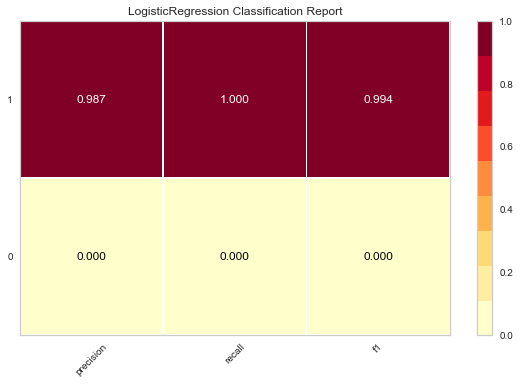

In [423]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(lr, classes=[0,1])
visualizer.fit(xtrain, ytrain) # Fit the training data to the visualizer
visualizer.score(xtest,ytest) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [401]:
confusion_matrix(ytest,pred_y_lgu)

array([[     0,   1494],
       [     0, 114424]], dtype=int64)

In [402]:
matthews_corrcoef(ytest,pred_y_lg)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

In [403]:
# Is our model still predicting just one class?
print( np.unique( pred_y_lg ) )

[1]


In [404]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",max_depth=7,n_estimators=20,max_features=0.2)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [405]:
pred_y_rfu=rf.predict(xtest)

In [406]:
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))
print(cohen_kappa_score(ytest,pred_y_rfu))
print(classification_report(ytest,pred_y_rfu))

0.9929752692505351
0.9930381821632533
0.6354932735630447
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1494
           1       0.99      1.00      1.00    114424

    accuracy                           0.99    115918
   macro avg       0.98      0.74      0.82    115918
weighted avg       0.99      0.99      0.99    115918



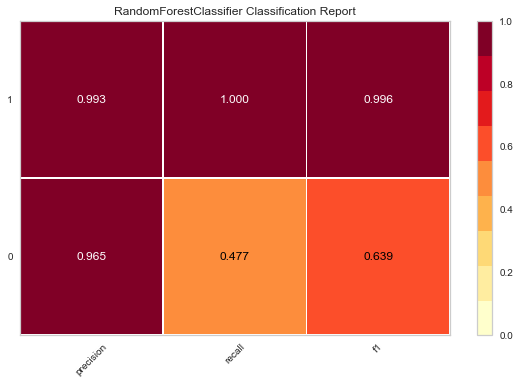

In [422]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rf, classes=[0,1])
visualizer.fit(xtrain, ytrain) # Fit the training data to the visualizer
visualizer.score(xtest,ytest) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [407]:
## importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
###Initializing
knn=KNeighborsClassifier()
##Fitting the model with training set
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [408]:
pred_y_knnu=knn.predict(xtest)

In [414]:
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))
print(cohen_kappa_score(ytest,pred_y_knnu))
print(classification_report(ytest,pred_y_knnu))

0.9878546102568463
0.9872927414206595
0.0992271100061638
              precision    recall  f1-score   support

           0       0.57      0.06      0.10      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.78      0.53      0.55    115918
weighted avg       0.98      0.99      0.98    115918



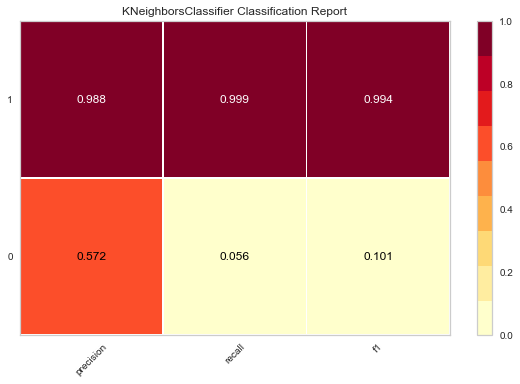

In [410]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=[0,1])
visualizer.fit(xtrain, ytrain) # Fit the training data to the visualizer
visualizer.score(xtest,ytest) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [412]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [413]:
pred_y_dtreeu=dtree.predict(xtest)

In [415]:
print(dtree.score(xtrain,ytrain))
print(dtree.score(xtest,ytest))
print(cohen_kappa_score(ytest,pred_y_dtreeu))
print(classification_report(ytest,pred_y_dtreeu))

0.9985580815830046
0.988681654272848
0.5655101802282749
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1494
           1       0.99      0.99      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.78      0.79      0.78    115918
weighted avg       0.99      0.99      0.99    115918



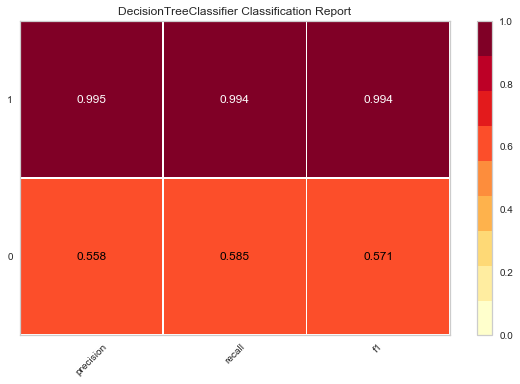

In [416]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dtree, classes=[0,1])
visualizer.fit(xtrain, ytrain) # Fit the training data to the visualizer
visualizer.score(xtest,ytest) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [418]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [419]:
pred_y_gnbu=gnb.predict(xtest)

In [420]:
print(gnb.score(xtrain,ytrain))
print(gnb.score(xtest,ytest))
print(cohen_kappa_score(ytest,pred_y_gnbu))
print(classification_report(ytest,pred_y_gnbu))

0.9841388974130505
0.9844717817767732
0.013826088999968955
              precision    recall  f1-score   support

           0       0.05      0.01      0.02      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.98    115918
   macro avg       0.52      0.50      0.51    115918
weighted avg       0.98      0.98      0.98    115918



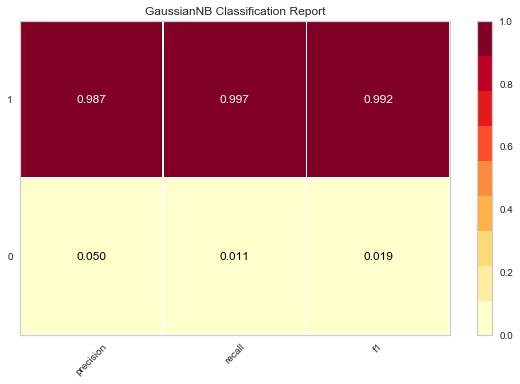

In [421]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=[0,1])
visualizer.fit(xtrain, ytrain) # Fit the training data to the visualizer
visualizer.score(xtest,ytest) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

### Applying threshold of 0.95 to predict probality

In [ ]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
y_pred_score = lg.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred = adjusted_classes(y_scores, 0.95)

In [ ]:
print(lg.score(xtrain,ytrain))
print(lg.score(xtest,ytest))
print(cohen_kappa_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

In [ ]:
print(confusion_matrix(ytest,y_pred))

In [ ]:
print(metrics.precision_score(ytest,y_pred))
print(metrics.recall_score(ytest,y_pred))
print(metrics.f1_score(ytest,y_pred))
print(metrics.roc_curve(ytest, y_pred))
print(metrics.auc(fp, tp))

#### After applying threshold as 0.90

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn import metrics

In [ ]:

#set seed for same results everytime
seed=0

#create a list of models
models=[lg,rf,dtree,gnb,knn]

def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def score_model(xtrain,ytrain,xtest,ytest):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
   #read model one by one
    for model in models:

        y_pred_score = model.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
        y_pred = adjusted_classes(y_scores, 0.90)

        #compute metrics
        train_accuracy=model.score(xtrain,ytrain)
        test_accuracy=model.score(xtest,ytest)

        p_score=metrics.precision_score(ytest,y_pred)
        r_score=metrics.recall_score(ytest,y_pred)
        f1_score=metrics.f1_score(ytest,y_pred)
        fp, tp, th = metrics.roc_curve(ytest, y_pred)

        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=p_score
        df.loc[i,"Recall"]=r_score
        df.loc[i,"Train_Accuracy"]=train_accuracy
        df.loc[i,"Test_Accuracy"]=test_accuracy
        df.loc[i,"F1_Score"]=f1_score
        df.loc[i,'AUC'] = metrics.auc(fp, tp)

        i+=1
   
   #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)


In [ ]:
report_no_null=score_model(xtrain,ytrain,xtest,ytest)
report_no_null

# Modelling builig and evalution_Mahi

In [201]:
df2.shape

(386391, 14)

In [202]:
df2["CASE_STATUS"].value_counts()

1    381315
0      5076
Name: CASE_STATUS, dtype: int64

In [326]:
from sklearn.utils import resample
df_credit=df2[df2.CASE_STATUS==1]
df_denied=df2[df2.CASE_STATUS==0]

## upsampling the deniedcases

df_minority_upsampled=resample(df_denied,replace=True,n_samples=380000)

#Combine majority class with unsample miniority class

new_df2=pd.concat([df_credit,df_minority_upsampled])

from sklearn.utils import shuffle
new_df2=shuffle(new_df2)

In [327]:
X_features=list(new_df2.columns)
# Remove the respose variable from list
X_features.remove("CASE_STATUS")
X_features

['TOTAL_WORKERS',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'PW_SOURCE_YEAR',
 'H-1B_DEPENDENT',
 'WILLFUL_VIOLATOR',
 'CS_DD_Duration',
 'Emp_Stay_Duration_Yr',
 'EMPLOYER_FREQUENCY',
 'AGENT_ATTORNEY',
 'OCCUPATION',
 'PWGrWGFm']

In [328]:
dum_df_x=pd.get_dummies(new_df2[X_features], drop_first=True)

X=dum_df_x.drop(["TOTAL_WORKERS"], axis=1)
X.head()

,PREVAILING_WAGE,PW_SOURCE_YEAR,EMPLOYER_FREQUENCY,FULL_TIME_POSITION_Y,PW_UNIT_OF_PAY_Year,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_Y,CS_DD_Duration_1 days 00:00:00,CS_DD_Duration_2 days 00:00:00,CS_DD_Duration_3 days 00:00:00,...,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,PWGrWGFm_Y
274720,32.12,2016.0,74,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
517873,95306.00,2016.0,378,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
505793,61214.00,2016.0,69,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
305081,92997.00,2016.0,2,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
261754,61360.00,2017.0,61,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [329]:
y=new_df2["CASE_STATUS"].astype(int)

In [330]:
new_df2["CASE_STATUS"].value_counts()

1    381315
0    380000
Name: CASE_STATUS, dtype: int64

In [331]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [332]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(532920, 32)
(228395, 32)
(532920,)
(228395,)


In [333]:
219395+219395

438790

In [334]:
from sklearn.linear_model import LogisticRegression
## Initializing
logit=LogisticRegression()
## Fitting the model
logit.fit(X_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [335]:
pred_y=logit.predict(X_test)

In [336]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y))

[[104967   9182]
 [ 88894  25352]]


In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.54      0.92      0.68    114149
           1       0.73      0.22      0.34    114246

    accuracy                           0.57    228395
   macro avg       0.64      0.57      0.51    228395
weighted avg       0.64      0.57      0.51    228395



In [338]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

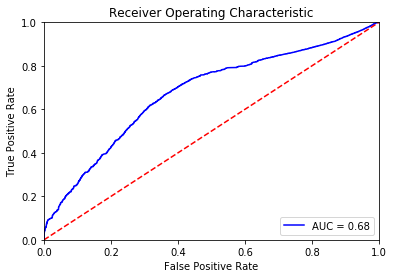

In [339]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [340]:
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef,cohen_kappa_score
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.5707179313968326
0.5705860461043368
0.14142646193797304
              precision    recall  f1-score   support

           0       0.54      0.92      0.68    114149
           1       0.73      0.22      0.34    114246

    accuracy                           0.57    228395
   macro avg       0.64      0.57      0.51    228395
weighted avg       0.64      0.57      0.51    228395



In [378]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [379]:
pred_y_dtree=dtree.predict(X_test)

In [380]:
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y_dtree))
print(classification_report(y_test,pred_y_dtree))

0.9965942355325377
0.9930515116355437
0.9861030873837245
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    114149
           1       1.00      0.99      0.99    114246

    accuracy                           0.99    228395
   macro avg       0.99      0.99      0.99    228395
weighted avg       0.99      0.99      0.99    228395



# Random Forest

In [341]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="gini",max_depth=7,n_estimators=20,max_features=0.2)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [342]:
pred_y_rfg=rf.predict(X_test)

In [343]:
## classification report for RF
print(classification_report(y_test,pred_y_rfg))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84    114149
           1       0.82      0.90      0.86    114246

    accuracy                           0.85    228395
   macro avg       0.85      0.85      0.85    228395
weighted avg       0.85      0.85      0.85    228395



In [344]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y_rfg))

0.8519440066051189
0.8499792026970818
0.6999451879990157


In [345]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier(criterion="entropy",max_depth=7,n_estimators=20,max_features=0.2)
rfe.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [346]:
pred_y_rfe=rfe.predict(X_test)

In [347]:
print(rfe.score(X_train,y_train))
print(rfe.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y_rfe))
print(classification_report(y_test,pred_y_rfe))

0.8487089994745928
0.84692747214256
0.6938427002940593
              precision    recall  f1-score   support

           0       0.88      0.80      0.84    114149
           1       0.82      0.89      0.85    114246

    accuracy                           0.85    228395
   macro avg       0.85      0.85      0.85    228395
weighted avg       0.85      0.85      0.85    228395



In [348]:
# Create a dataframe to store the features and thier corresponding importance
feature_rank=pd.DataFrame({'feature':X_train.columns,
                          "importance":rfe.feature_importances_})

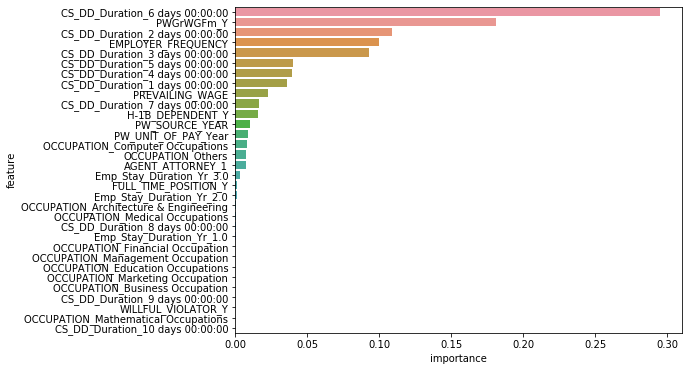

In [349]:
#Sorting the features based on thier importance
feature_rank=feature_rank.sort_values("importance", ascending=False)
##ploting
plt.figure(figsize=(8,6))
sns.barplot(y="feature",x="importance",data=feature_rank)

# Knn

In [354]:
## importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
###Initializing
knn=KNeighborsClassifier()
##Fitting the model with training set
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [355]:
## predicting
pred_y_knn=knn.predict(X_test)

In [352]:
## Confusion matrix for knn
print(confusion_matrix(y_test,pred_y_knn))

[[113984    165]
 [  4317 109929]]


In [356]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y_knn))
print(classification_report(y_test,pred_y_knn))

0.9858515349395782
0.9803761028043521
0.9607528045601414
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114149
           1       1.00      0.96      0.98    114246

    accuracy                           0.98    228395
   macro avg       0.98      0.98      0.98    228395
weighted avg       0.98      0.98      0.98    228395



# GNB 

In [357]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [358]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [359]:
pred_y_gnb=gnb.predict(X_test)

In [360]:
## Confusion matrix for gnb
print(confusion_matrix(y_test,pred_y_gnb))

[[  3234 110915]
 [  1643 112603]]


In [362]:
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))
print(cohen_kappa_score(y_test,pred_y_gnb))
print(classification_report(y_test,pred_y_gnb))

0.5084515499512122
0.5071783532914468
0.01395581537552193
              precision    recall  f1-score   support

           0       0.66      0.03      0.05    114149
           1       0.50      0.99      0.67    114246

    accuracy                           0.51    228395
   macro avg       0.58      0.51      0.36    228395
weighted avg       0.58      0.51      0.36    228395



In [324]:
# Is our model still predicting just one class?
print( np.unique( pred_y_gnb ) )

[0 1]


In [366]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y_gnb)

0.5071783532914468

In [373]:
!pip install yellowbrick

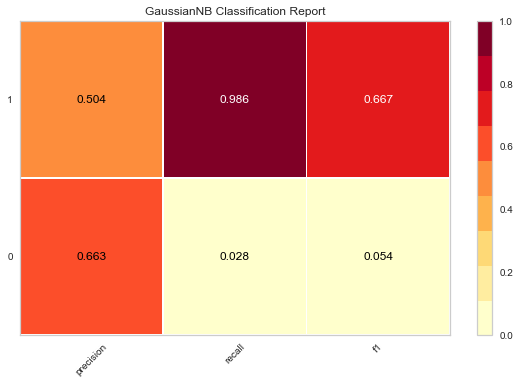

In [374]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=[0,1])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test,y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

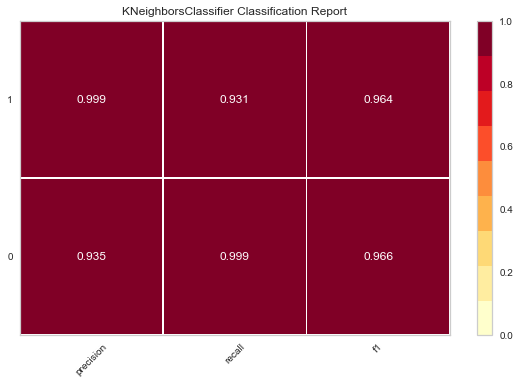

In [375]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=[0,1])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test,y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


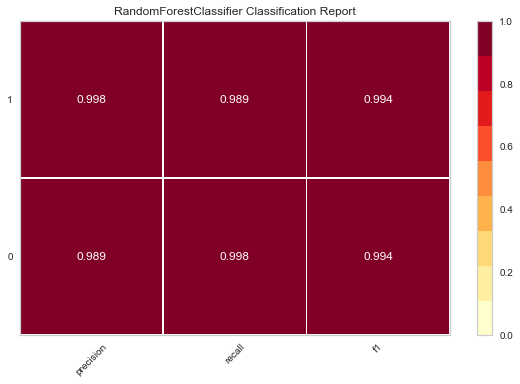

In [376]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rf, classes=[0,1])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test,y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

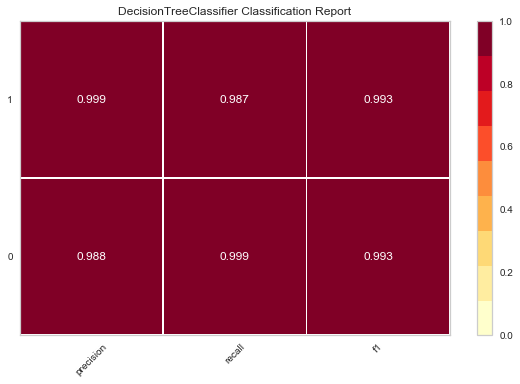

In [381]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dtree, classes=[0,1])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test,y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# SL classifer like KnN and Ensemble method like Decision tree and Random Forest hold overall good score, can be use to prediction of model, 
# As data set has many of categorical data type,Therefore Logisitic, and GNB have overall average score. cant be use for prediction of model.

In [383]:
!ipython nbconvert FINAL_INTERIM_CODE_CLEANED-Copy1.ipynb --to html

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook FINAL_INTERIM_CODE_CLEANED-Copy1.ipynb to html
[NbConvertApp] Writing 1296528 bytes to FINAL_INTERIM_CODE_CLEANED-Copy1.html
